# Correlation Matrix for exploratory data analysis

TL;DR: Pandas Dataframes to quickly build a correlation matrix to visualize trends in a dataset.

You are accumulating data all the time. You then distill the findings into neat tables. At some point you will be asking yourself - are there any relationships between values in my dataset? Very quickly there will be too many to just randomly plot against each other in Excel or Origin. But the data set might not be large enough or not curated enough for e.g. the use of Subgroup Discovery or other exploratory data analysis techniques.

If you are tabulating your data, few lines of code can give you a quick visual representation of Pearson correlation in your data table:



Pearson correlation is useful for finding linear trends in the dataset and maintains the sign (positive or negative linear correlation). The <i>r</i> when squared (<i>R²</i>) is the coefficient of determination and it conveys the fit quality.

Example dataset is about adsorption energy of intermediates in CO2 hydrogenation to methanol on low-index Pd surfaces. Minimal table adapted from: https://doi.org/10.1039/D2CP01019D

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

"""
First load the CSV file into the DataFrame - use the read_csv method.
The encoding is only used when some less common characters are used in 
column names. index_col=0 points to the first column to be used as row indices.
"""
df = pd.read_csv("data/Pd_CO2.csv", delimiter=",", encoding="ISO-8859-1", index_col=0)

In [2]:
# Examine our DataFrame
df

,Eads of CO2 /eV,Eads of CO2- /eV,Eads of HCOO /eV,Eads of HCOOH /eV,Eads of H2COOH /eV,Eads of CH2O /eV,Eads of CH3O /eV,Eads of CH3OH /eV,Surface energy /Jm^-2
Surface,,,,,,,,,
Pd (100),-0.183608,-0.127312,-2.732308,-0.670896,-2.347647,-0.926390,-2.353089,-0.573661,1.91
Pd (110),-0.162321,-0.227370,-2.903095,-0.538165,-2.404782,-1.048041,-2.173203,-0.712622,1.99
Pd (111),-0.208814,0.056009,-2.654076,-0.671991,-2.109862,-0.752050,-2.126275,-0.577560,1.72


In [3]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a styled correlation matrix with fewer decimal points and a heatmap
styled_corr = corr_matrix.style.format("{:.3f}").background_gradient(cmap='coolwarm')

In [4]:
# view the correlation matrix
styled_corr

,Eads of CO2 /eV,Eads of CO2- /eV,Eads of HCOO /eV,Eads of HCOOH /eV,Eads of H2COOH /eV,Eads of CH2O /eV,Eads of CH3O /eV,Eads of CH3OH /eV,Surface energy /Jm^-2
Eads of CO2 /eV,1.000,-0.993,-0.966,0.845,-0.958,-0.999,-0.243,-0.827,0.983
Eads of CO2- /eV,-0.993,1.000,0.929,-0.775,0.985,0.998,0.357,0.754,-0.998
Eads of HCOO /eV,-0.966,0.929,1.000,-0.954,0.852,0.951,-0.014,0.944,-0.904
Eads of HCOOH /eV,0.845,-0.775,-0.954,1.000,-0.655,-0.815,0.314,-0.999,0.733
Eads of H2COOH /eV,-0.958,0.985,0.852,-0.655,1.000,0.972,0.512,0.631,-0.994
Eads of CH2O /eV,-0.999,0.998,0.951,-0.815,0.972,1.000,0.295,0.796,-0.992
Eads of CH3O /eV,-0.243,0.357,-0.014,0.314,0.512,0.295,1.000,-0.344,-0.415
Eads of CH3OH /eV,-0.827,0.754,0.944,-0.999,0.631,0.796,-0.344,1.000,-0.711
Surface energy /Jm^-2,0.983,-0.998,-0.904,0.733,-0.994,-0.992,-0.415,-0.711,1.000


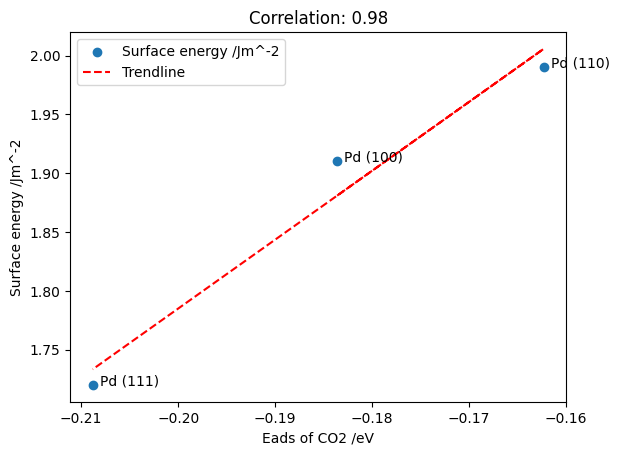

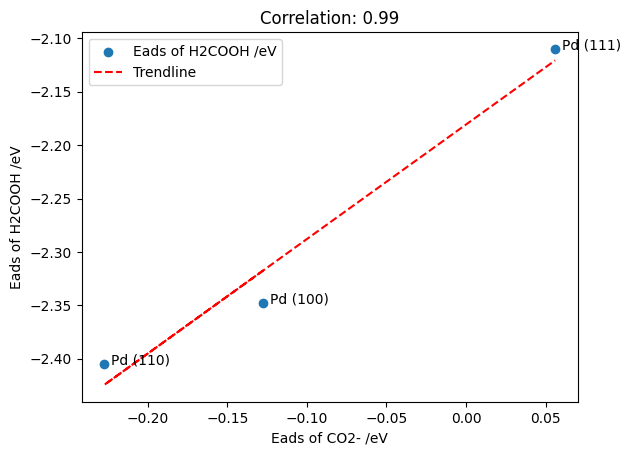

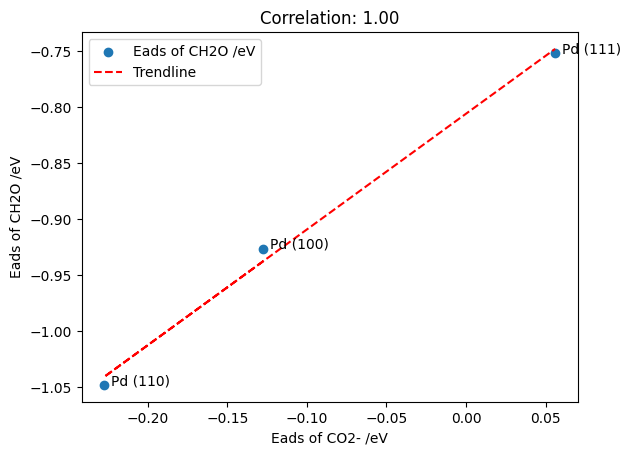

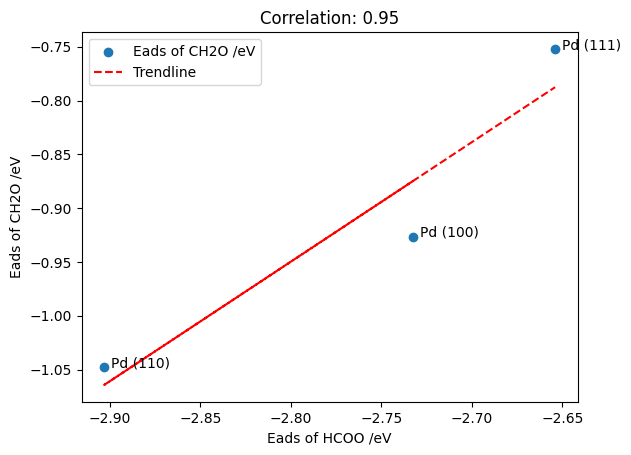

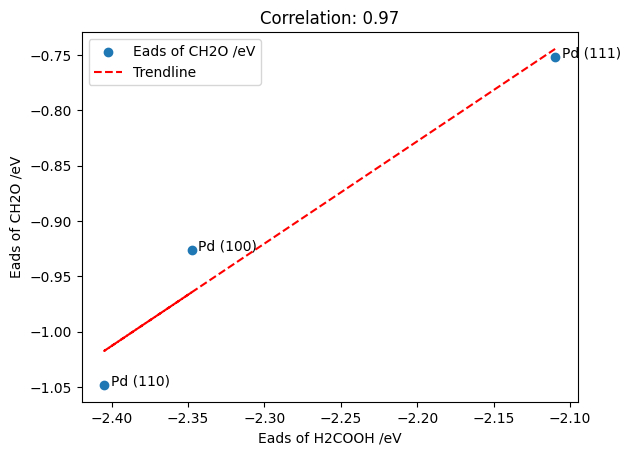

In [5]:
# Define the minimum and maximum correlation values to include
# Remember fit quality is r^2
min_corr = 0.95
max_corr = 1.00

# Loop through the columns of the DataFrame and create scatter plots
for i, col1 in enumerate(df.columns):
    for j, col2 in enumerate(df.columns):
        if i < j and corr_matrix.loc[col1, col2] >= min_corr and corr_matrix.loc[col1, col2] <= max_corr:
            # Create scatter plot
            plt.scatter(df[col1], df[col2], label=col2)
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.title(f'Correlation: {corr_matrix.loc[col1, col2]:.2f}')
            
            # Add data labels to the scatter plot
            for k, row in df.iterrows():
                plt.annotate(k, xy=(row[col1], row[col2]), xytext=(5, 0), textcoords='offset points')
            
            try:
                # Fit trendline
                z = np.polyfit(df[col1], df[col2], 1)
                p = np.poly1d(z)
                plt.plot(df[col1], p(df[col1]), "r--", label='Trendline')
            except:
                pass
            
                    
            
            plt.legend()
            plt.show()

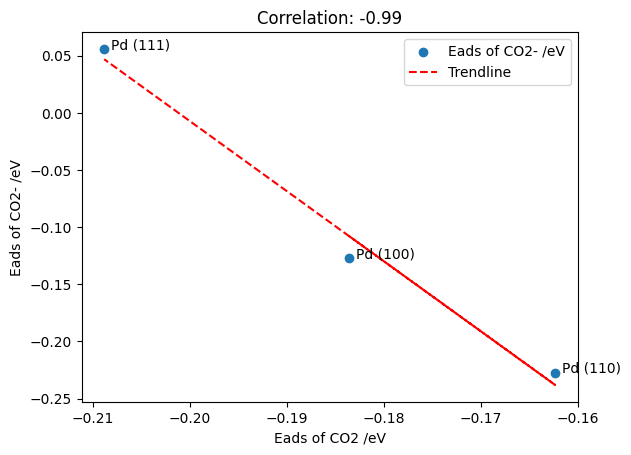

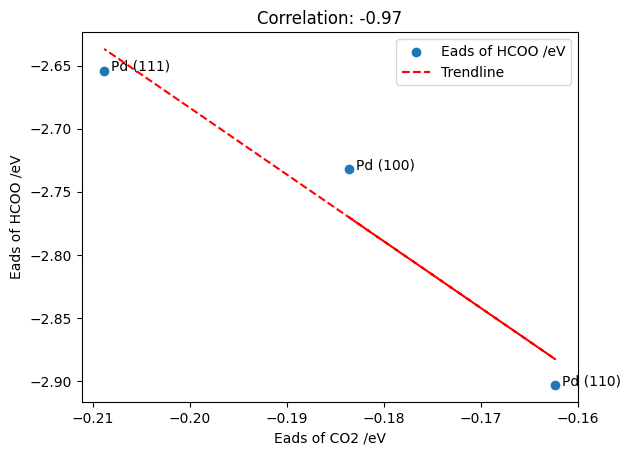

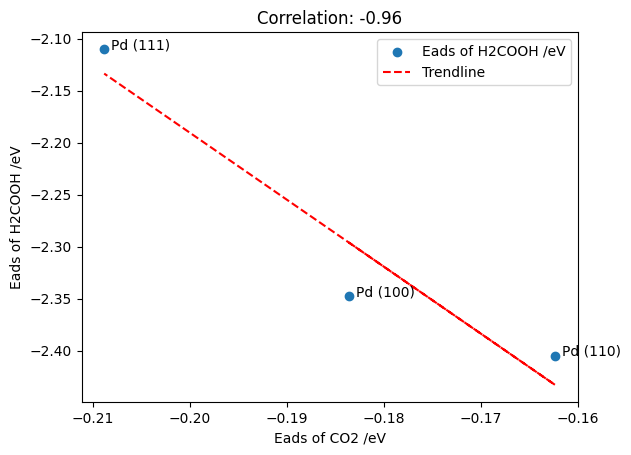

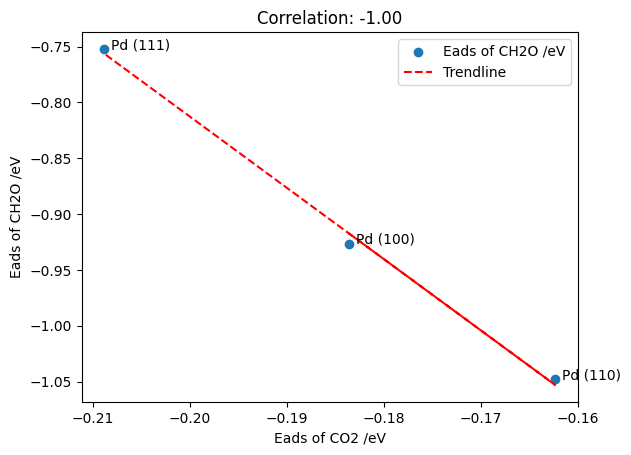

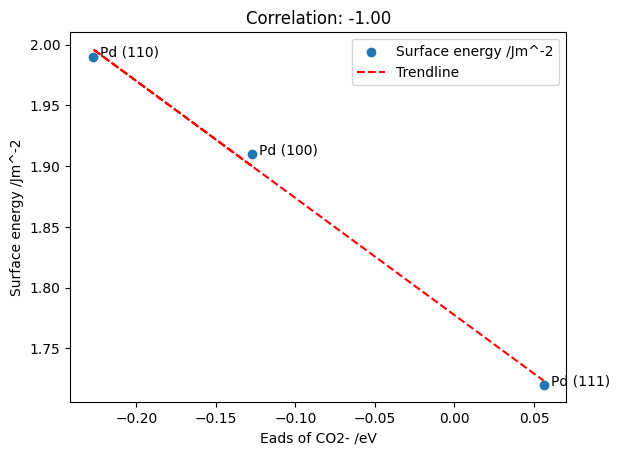

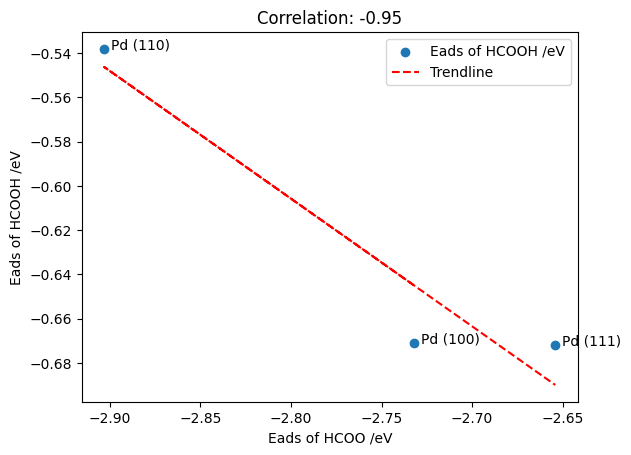

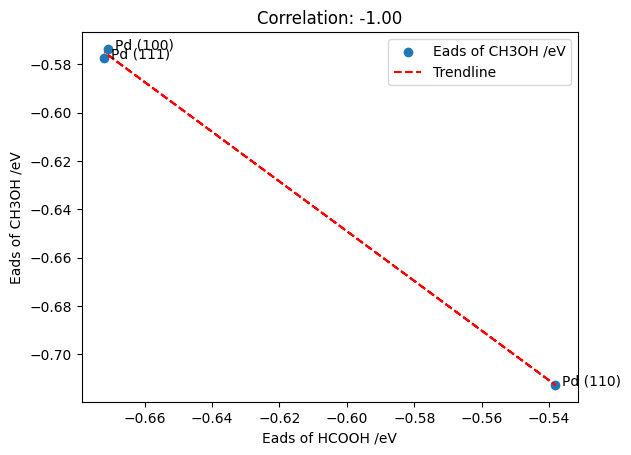

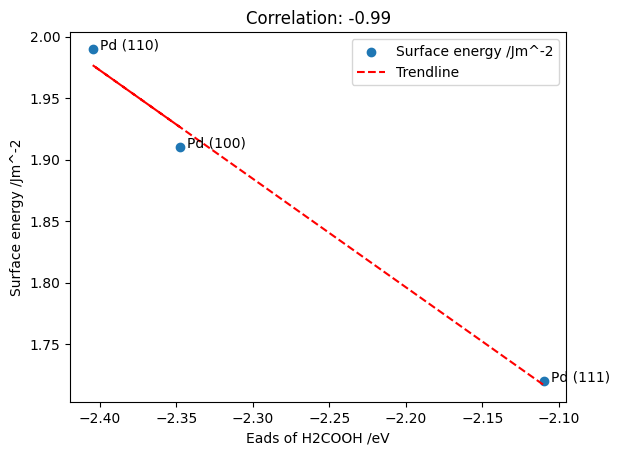

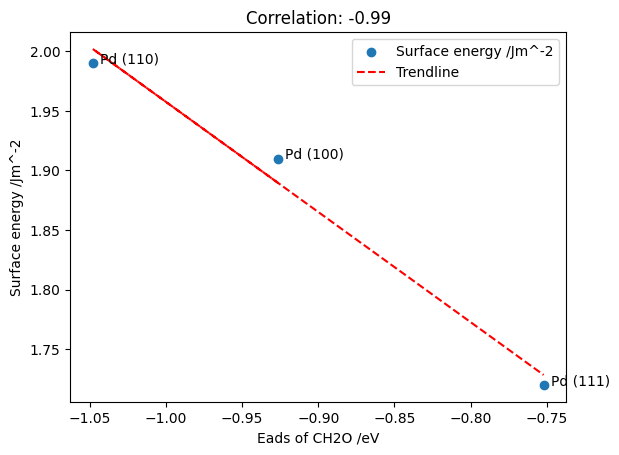

In [6]:
# Define the minimum and maximum correlation values to include 
min_corr = -1.00
max_corr = -0.95

# Loop through the columns of the DataFrame and create scatter plots
for i, col1 in enumerate(df.columns):
    for j, col2 in enumerate(df.columns):
        if i < j and corr_matrix.loc[col1, col2] >= min_corr and corr_matrix.loc[col1, col2] <= max_corr:
            # Create scatter plot
            plt.scatter(df[col1], df[col2], label=col2)
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.title(f'Correlation: {corr_matrix.loc[col1, col2]:.2f}')
            
            # Add data labels to the scatter plot
            for k, row in df.iterrows():
                plt.annotate(k, xy=(row[col1], row[col2]), xytext=(5, 0), textcoords='offset points')
            
            try:
                # Fit trendline
                z = np.polyfit(df[col1], df[col2], 1)
                p = np.poly1d(z)
                plt.plot(df[col1], p(df[col1]), "r--", label='Trendline')
            except:
                pass
            
            plt.legend()
            plt.show()

Remember about poor fit, e.g. adsorption energy scaling with surface energy is common, why some species do not follow the trends?

Additionally you might be interested in looking at outliers in the data. To identify outliers in the linear fits, you can use the residuals of the linear regression. Residuals are the differences between the actual values and the predicted values of the dependent variable (in this case, col2) based on the independent variable (in this case, col1). You can calculate the residuals as follows:

residuals = df[col2] - p(df[col1])

Then, you can use the interquartile range (IQR) method to detect outliers. IQR is the range between the first quartile (25th percentile) and the third quartile (75th percentile) of a set of data. Any data point that falls below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR is considered an outlier.

Of course oneshould not really consider outliers in a liner fit of three points, but this method can be applied to larger datasets.

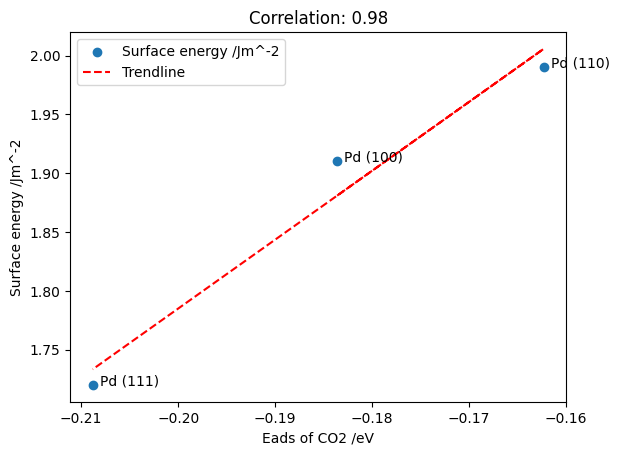

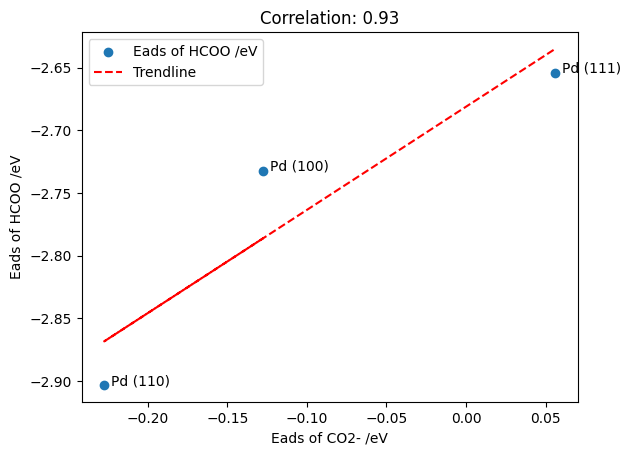

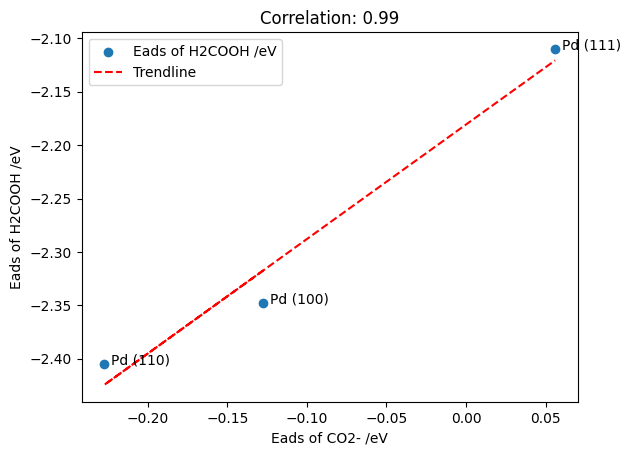

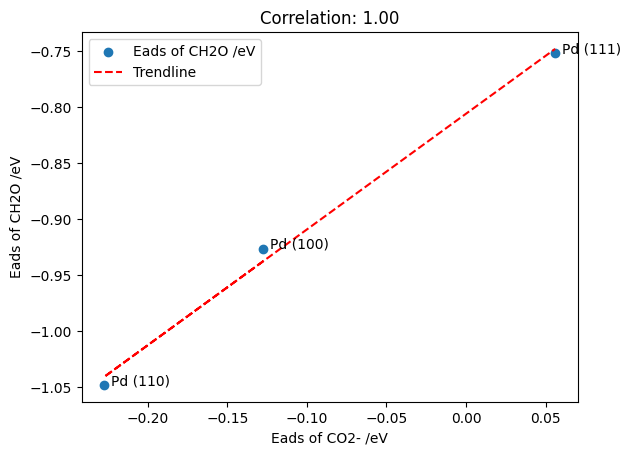

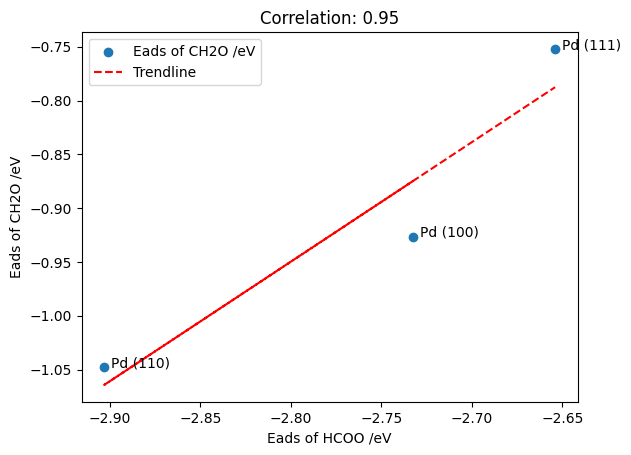

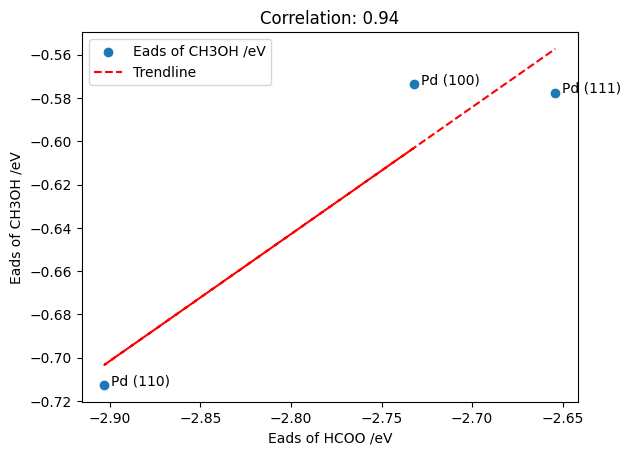

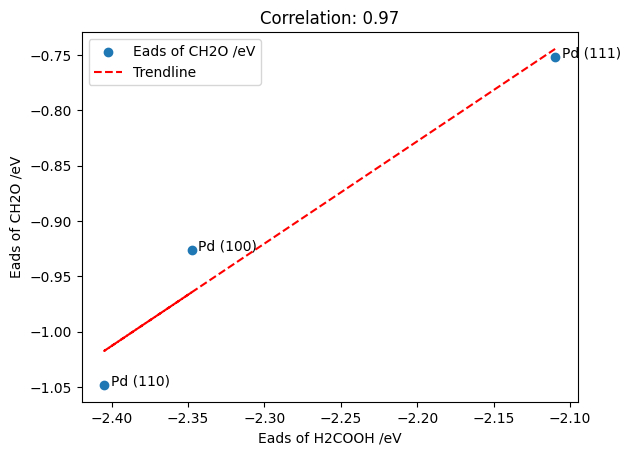

In [7]:
# Define the minimum and maximum correlation values to include
# Remember fit quality is r^2
min_corr = 0.90
max_corr = 1.00

# Loop through the columns of the DataFrame and create scatter plots
for i, col1 in enumerate(df.columns):
    for j, col2 in enumerate(df.columns):
        if i < j and corr_matrix.loc[col1, col2] >= min_corr and corr_matrix.loc[col1, col2] <= max_corr:
            # Create scatter plot
            plt.scatter(df[col1], df[col2], label=col2)
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.title(f'Correlation: {corr_matrix.loc[col1, col2]:.2f}')
            
            # Add data labels to the scatter plot
            for k, row in df.iterrows():
                plt.annotate(k, xy=(row[col1], row[col2]), xytext=(5, 0), textcoords='offset points')
            
            try:
                # Fit trendline
                z = np.polyfit(df[col1], df[col2], 1)
                p = np.poly1d(z)
                plt.plot(df[col1], p(df[col1]), "r--", label='Trendline')
            except:
                pass
            
            # Identify outliers
            residuals = df[col2] - p(df[col1])
            q1 = residuals.quantile(0.25)
            q3 = residuals.quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            outliers = residuals[(residuals < lower_bound) | (residuals > upper_bound)]
            if not outliers.empty:
                for index, value in outliers.items():
                    plt.annotate(f'{index} (outlier)', xy=(df.loc[index, col1], 
                                                           df.loc[index, col2]), xytext=(5, 0), 
                                                           textcoords='offset points', color='red')
            
            plt.legend()
            plt.show()
